In [19]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform
from config import api_key

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

In [20]:
# Randomly generate a list of 1750 cities. 
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      740
City       740
Country    740
dtype: int64

In [21]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Cloudiness (%)", "Country", "Date", "Humidity (%)" ,
                "Latitude","Longitude", "Max Temperature (F)",
                "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Max Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        clean_cities_df.set_value(index, "Date", city_data["dt"])

        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

------------------------
Proceesing: City #  1  |  Saint-Augustin FR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=saint-augustin
------------------------
Proceesing: City #  2  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=rikitea
------------------------
Proceesing: City #  3  |  Talnakh RU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=talnakh
------------------------
Proceesing: City #  4  |  Ust-Tsilma RU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=ust-tsilma
City not found, skipping...
------------------------
Proceesing: City #  5  |  Kaitangata NZ
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=kaitangata
------------------------
Proceesing: City #  6  |  Lerwick GB
http://api.openweat

------------------------
Proceesing: City #  48  |  Sao Jose da Coroa Grande BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=sao+jose+da+coroa+grande
------------------------
Proceesing: City #  49  |  Butaritari KI
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=butaritari
------------------------
Proceesing: City #  50  |  Albany US
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=albany
------------------------
Proceesing: City #  51  |  Gazanjyk TM
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=gazanjyk
------------------------
Proceesing: City #  52  |  Miyako JP
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=miyako
City not found, skipping...
------------------------
Proceesing: City #  53  |  Yellowknife 

------------------------
Proceesing: City #  94  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=hermanus
------------------------
Proceesing: City #  95  |  Tucurui BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=tucurui
------------------------
Proceesing: City #  96  |  Molodizhne UA
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=molodizhne
------------------------
Proceesing: City #  97  |  Harper US
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=harper
------------------------
Proceesing: City #  98  |  Biltine TD
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=biltine
------------------------
Proceesing: City #  99  |  Tuktoyaktuk CA
http://api.openweathermap.org/data/2.5/weather?appid=53aa

------------------------
Proceesing: City #  140  |  Puerto Cabezas NI
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=puerto+cabezas
------------------------
Proceesing: City #  141  |  Gari RU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=gari
------------------------
Proceesing: City #  142  |  New Norfolk AU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=new+norfolk
City not found, skipping...
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  143  |  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=severo-kurilsk
------------------------
Proceesing: City #  144  |  Torbay CA
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=torbay
-------------

------------------------
Proceesing: City #  186  |  Svetlaya RU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=svetlaya
------------------------
Proceesing: City #  187  |  Dawlatabad AF
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=dawlatabad
------------------------
Proceesing: City #  188  |  Cumpas MX
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=cumpas
City not found, skipping...
------------------------
Proceesing: City #  189  |  Juneau US
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=juneau
------------------------
Proceesing: City #  190  |  Espeland NO
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=espeland
------------------------
Proceesing: City #  191  |  Saldanha PT
http://api.openweathermap.

------------------------
Proceesing: City #  232  |  Srandakan ID
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=srandakan
------------------------
Proceesing: City #  233  |  Puerto Escondido MX
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=puerto+escondido
------------------------
Proceesing: City #  234  |  Kui Buri TH
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=kui+buri
------------------------
Proceesing: City #  235  |  Airai TL
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=airai
------------------------
Proceesing: City #  236  |  Ust-Omchug RU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=ust-omchug
------------------------
Proceesing: City #  237  |  Teahupoo PF
http://api.openweathermap.org/data

------------------------
Proceesing: City #  278  |  Hun BE
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=hun
------------------------
Proceesing: City #  279  |  San Rafael AR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=san+rafael
------------------------
Proceesing: City #  280  |  Neuquen AR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=neuquen
------------------------
Proceesing: City #  281  |  Mana RS
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=mana
------------------------
Proceesing: City #  282  |  Cabedelo BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=cabedelo
City not found, skipping...
------------------------
Proceesing: City #  283  |  San Cristobal EC
http://api.openweathermap.org/dat

City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  325  |  Lagoa PT
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=lagoa
------------------------
Proceesing: City #  326  |  Brae GB
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=brae
------------------------
Proceesing: City #  327  |  Luderitz NA
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=luderitz
------------------------
Proceesing: City #  328  |  Maldonado UY
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=maldonado
City not found, skipping...
------------------------
Proceesing: City #  329  |  Ilhabela BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=ilhabela
------------------------
Proceesing: City #

------------------------
Proceesing: City #  370  |  Port Lincoln AU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=port+lincoln
------------------------
Proceesing: City #  371  |  Makinsk KZ
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=makinsk
------------------------
Proceesing: City #  372  |  Bafoulabe ML
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=bafoulabe
------------------------
Proceesing: City #  373  |  Novikovo UA
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=novikovo
------------------------
Proceesing: City #  374  |  Vila Velha BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=vila+velha
------------------------
Proceesing: City #  375  |  Campbell River CA
http://api.openweathermap.org/da

------------------------
Proceesing: City #  416  |  Boende CD
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=boende
------------------------
Proceesing: City #  417  |  Sombrerete MX
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=sombrerete
------------------------
Proceesing: City #  418  |  Bambous Virieux MU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=bambous+virieux
------------------------
Proceesing: City #  419  |  Villamontes BO
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=villamontes
------------------------
Proceesing: City #  420  |  Yeppoon AU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=yeppoon
------------------------
Proceesing: City #  421  |  Banyo CM
http://api.openweathermap.org/data/

------------------------
Proceesing: City #  462  |  Konevo BG
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=konevo
------------------------
Proceesing: City #  463  |  Peace River CA
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=peace+river
------------------------
Proceesing: City #  464  |  Mae Sot MM
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=mae+sot
------------------------
Proceesing: City #  465  |  Capari MK
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=capari
------------------------
Proceesing: City #  466  |  Cotonou BJ
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=cotonou
------------------------
Proceesing: City #  467  |  Viru EE
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c

------------------------
Proceesing: City #  508  |  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=vila+franca+do+campo
------------------------
Proceesing: City #  509  |  Antequera PY
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=antequera
------------------------
Proceesing: City #  510  |  Prieska ZA
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=prieska
City not found, skipping...
------------------------
Proceesing: City #  511  |  Veraval FR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=veraval
------------------------
Proceesing: City #  512  |  Huarmey PE
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=huarmey
------------------------
Proceesing: City #  513  |  Stokmarknes NO

------------------------
Proceesing: City #  554  |  Takoradi GH
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=takoradi
------------------------
Proceesing: City #  555  |  Laguna MX
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=laguna
------------------------
Proceesing: City #  556  |  Emerald AU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=emerald
------------------------
Proceesing: City #  557  |  Kununurra AU
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=kununurra
------------------------
Proceesing: City #  558  |  Bail Hongal IN
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=bail+hongal
------------------------
Proceesing: City #  559  |  Tiznit MA
http://api.openweathermap.org/data/2.5/weather?app

------------------------
Proceesing: City #  601  |  Manta RO
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=manta
------------------------
Proceesing: City #  602  |  Christchurch NZ
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=christchurch
------------------------
Proceesing: City #  603  |  Warmbad DE
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=warmbad
------------------------
Proceesing: City #  604  |  Kalmunai LK
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=kalmunai
------------------------
Proceesing: City #  605  |  Coahuayana MX
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=coahuayana
------------------------
Proceesing: City #  606  |  Pierre US
http://api.openweathermap.org/data/2.5/weather?a

------------------------
Proceesing: City #  648  |  Oda JP
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=oda
------------------------
Proceesing: City #  649  |  Lingyuan CN
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=lingyuan
------------------------
Proceesing: City #  650  |  Posse BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=posse
------------------------
Proceesing: City #  651  |  Ipixuna BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=ipixuna
------------------------
Proceesing: City #  652  |  Progreso UY
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b2543ea80cc6837de&units=IMPERIAL&q=progreso
------------------------
Proceesing: City #  653  |  Cambara BR
http://api.openweathermap.org/data/2.5/weather?appid=53aa62c2dff88b5b

In [22]:
clean_cities_df.count()

City                   666
Cloudiness (%)         666
Country                666
Date                   666
Humidity (%)           666
Latitude               666
Longitude              666
Max Temperature (F)    666
Wind Speed (mph)       666
dtype: int64

In [23]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temperature (F),Wind Speed (mph)
0,Saint-Augustin,0,FR,1554664889,71,44.83,-0.61,53.08,8.05
1,Rikitea,32,PF,1554664984,100,-23.12,-134.97,77.15,8.3
2,Talnakh,88,RU,1554664819,94,69.49,88.39,19.55,5.17
3,Ust-Tsilma,88,RU,1554665043,86,65.44,52.15,33.59,2.26
4,Kaitangata,0,NZ,1554665043,65,-46.28,169.85,33.05,3.71


In [24]:
# Save data to a CSV file
clean_cities_df.to_csv("WeatherPy_files/City_Data.csv")

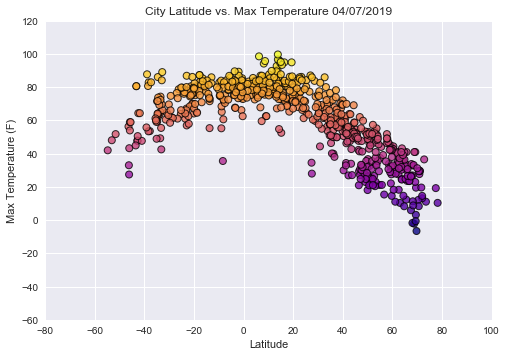

In [25]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Max Temperature (F)"], c=clean_cities_df["Max Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("WeatherPy_files/Latitude_Temperature.png")

# Show plot
plt.show()


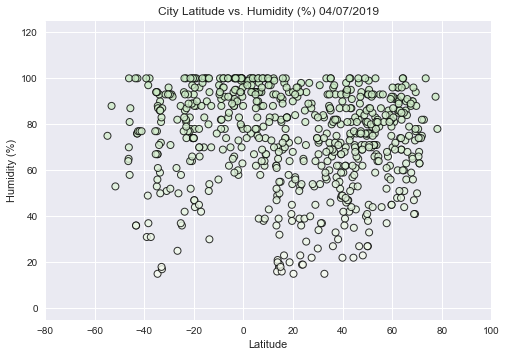

In [26]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("WeatherPy_files/Latitude_Humidity.png")

# Show plot
plt.show()

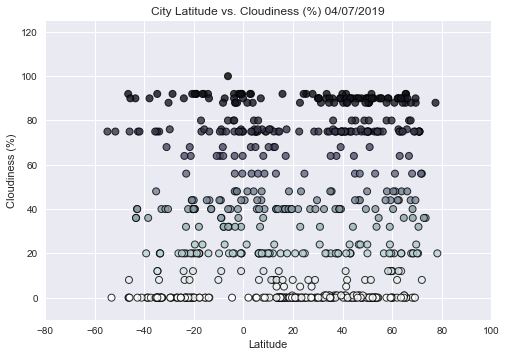

In [27]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("WeatherPy_files/Latitude_Cloudiness.png")

# Show plot
plt.show()


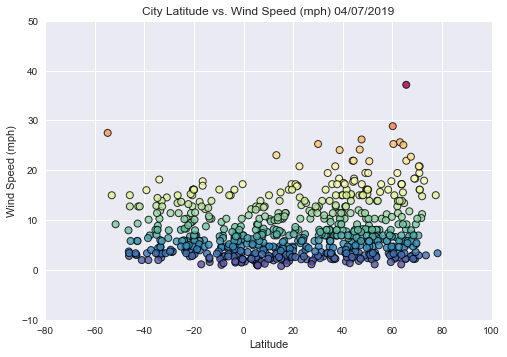

In [28]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("WeatherPy_files/Latitude_WindSpeed.png")

# Show plot
plt.show()

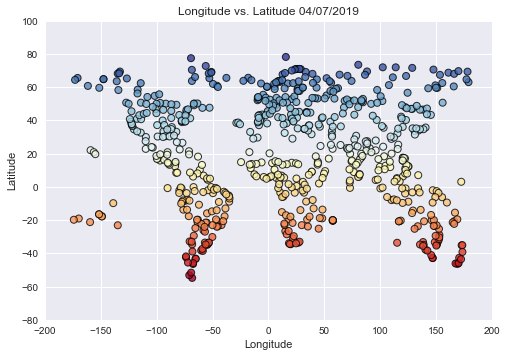

In [29]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("WeatherPy_files/Latitude_Longitude.png")

# Show plot
plt.show()

In [31]:
# Analysis of the data
# 1. This probably goes without saying but warmer average temperatures tend to be closer to the 0 latitude mark.
# 2. As expected, seasonal tempertures for cities in the Nothern and southern hemisphere had opposite high and low temps.
# 3. The data in the city v winspeed and city v humidity indicates that there more cities with a relative humidity greater than 50% and wind speed less than 15 mph.
